In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from PIL import Image

In [2]:
tt_datasets = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-07-02/tt_datasets.csv')

In [3]:
tt_summary = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-07-02/tt_summary.csv')

In [4]:
tt_urls = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-07-02/tt_urls.csv')

In [6]:
# This dataset had Windows-1254 encoding, wouldn't read, so I saved it in notepad with utf-8 encoding, and that fixed it.
# tt_variables = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-07-02/tt_variables.csv')
tt_variables = pd.read_csv('C:/tt_variables(1).csv')

**Questions**: What are the most common variable names? Of those variables, which are used to mean the same thing, and which are used to mean different things?

- the variable names are in the... `tt_variables.csv`, so I would need to bring that in some other way. Done.
- I don't know how to answer the second question. Would you look at ...? what would you look at?

I could do some sort of word cloud?

Other things to look at:
- from `tt_datasets`:
    - dataset names - are there common words?  (I would imagine 'data')
    - number of variables per year? Per time of year?
    - size of the datasets per year
    
- from `tt_summary`:
    - titles - are there common words?

- from `tt_urls`:
    - are there common names or subdomains?
    
- from `tt_variables`:
    - dataset names - already mentioned in tt_datasets
    - are there common variable names?

In [7]:
tt_datasets.head()

,year,week,dataset_name,variables,observations
0,2018,1,us_avg_tuition,13,50
1,2018,2,nfl_salary,11,800
2,2018,3,global_mortality,35,6156
3,2018,4,week4_australian_salary,6,2197
4,2018,5,week5_acs2015_county_data,37,3220


In [11]:
tt_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          644 non-null    int64 
 1   week          644 non-null    int64 
 2   dataset_name  644 non-null    object
 3   variables     644 non-null    int64 
 4   observations  644 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 25.3+ KB


In [8]:
tt_summary.head()

,year,week,date,title,source_title,article_title
0,2018,1,2018-04-03,US Tuition Costs,onlinembapage.com,onlinembapage.com
1,2018,2,2018-04-10,NFL Positional Salaries,Spotrac.com,fivethirtyeight.com
2,2018,3,2018-04-17,Global Mortality,ourworldindata.org,ourworldindata.org
3,2018,4,2018-04-24,Australian Salaries by Gender,data.gov.au,data.gov.au
4,2018,5,2018-05-01,ACS Census Data (2015),"census.gov , Kaggle",No article


In [12]:
tt_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           324 non-null    int64 
 1   week           324 non-null    int64 
 2   date           324 non-null    object
 3   title          324 non-null    object
 4   source_title   318 non-null    object
 5   article_title  318 non-null    object
dtypes: int64(2), object(4)
memory usage: 15.3+ KB


In [9]:
tt_urls.head()

,year,week,type,url,scheme,domain,subdomain,tld,path,query,fragment
0,2018,1,source,https://onlinembapage.com/average-tuition-and-...,https,onlinembapage,NaN,com,average-tuition-and-educational-attainment-in-...,NaN,NaN
1,2018,1,article,https://onlinembapage.com/wp-content/uploads/2...,https,onlinembapage,NaN,com,wp-content/uploads/2016/03/AverageTuition_Part...,NaN,NaN
2,2018,2,source,http://www.spotrac.com/rankings/,http,spotrac,www,com,rankings,NaN,NaN
3,2018,2,article,https://espnfivethirtyeight.files.wordpress.co...,https,wordpress,espnfivethirtyeight.files,com,2017/05/morris-nflrb-1.png,w=575&h=488&quality=90&strip=info,NaN
4,2018,3,source,https://ourworldindata.org/,https,ourworldindata,NaN,org,NaN,NaN,NaN


In [13]:
tt_urls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       684 non-null    int64 
 1   week       684 non-null    int64 
 2   type       684 non-null    object
 3   url        684 non-null    object
 4   scheme     684 non-null    object
 5   domain     684 non-null    object
 6   subdomain  423 non-null    object
 7   tld        684 non-null    object
 8   path       621 non-null    object
 9   query      39 non-null     object
 10  fragment   23 non-null     object
dtypes: int64(2), object(9)
memory usage: 58.9+ KB


In [10]:
tt_variables.head()

,year,week,dataset_name,variable,class,n_unique,min,max,description
0,2018,1,us_avg_tuition,State,character,50,Alabama,Wyoming,NaN
1,2018,1,us_avg_tuition,2004-05,double,50,3621.391742,11067.04373,NaN
2,2018,1,us_avg_tuition,2005-06,double,50,3687.289795,11295.1494,NaN
3,2018,1,us_avg_tuition,2006-07,double,50,3887.656069,11472.9832,NaN
4,2018,1,us_avg_tuition,2007-08,double,50,3879.416438,12012.90058,NaN


In [14]:
tt_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7897 entries, 0 to 7896
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          7897 non-null   int64 
 1   week          7897 non-null   int64 
 2   dataset_name  7897 non-null   object
 3   variable      7897 non-null   object
 4   class         7897 non-null   object
 5   n_unique      7897 non-null   int64 
 6   min           4949 non-null   object
 7   max           4924 non-null   object
 8   description   5931 non-null   object
dtypes: int64(3), object(6)
memory usage: 555.4+ KB


Starting with `tt_datasets`, lets look at dataset names.  We want to create a word cloud to see the most used names. They seem to be separated with an underscore, so we can start with splitting the names up into separate words.

In [15]:
tt_datasets['name_words'] = tt_datasets['dataset_name'].replace(r'_', ' ', regex=True)

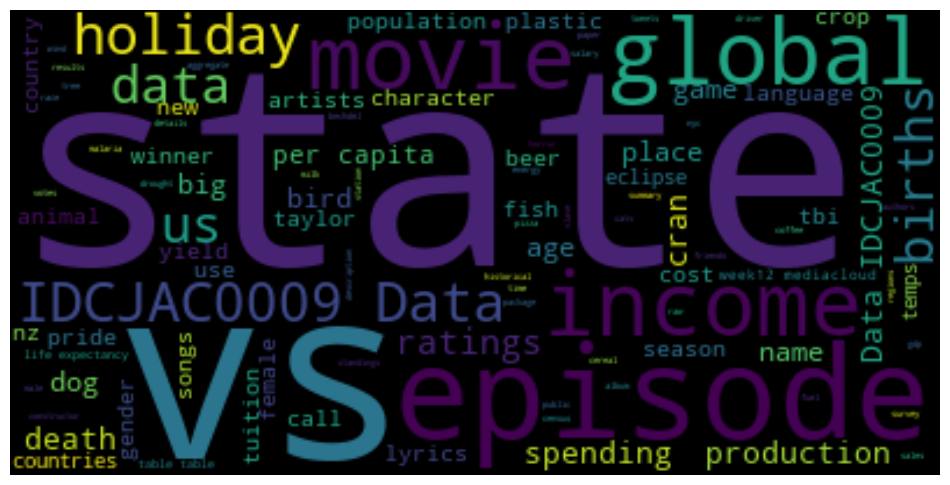

In [17]:
text = ' '.join(tt_datasets['name_words'])

wordcloud = WordCloud(max_words=100, random_state=1).generate(text)

plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Make it more TidyTuesday themed:

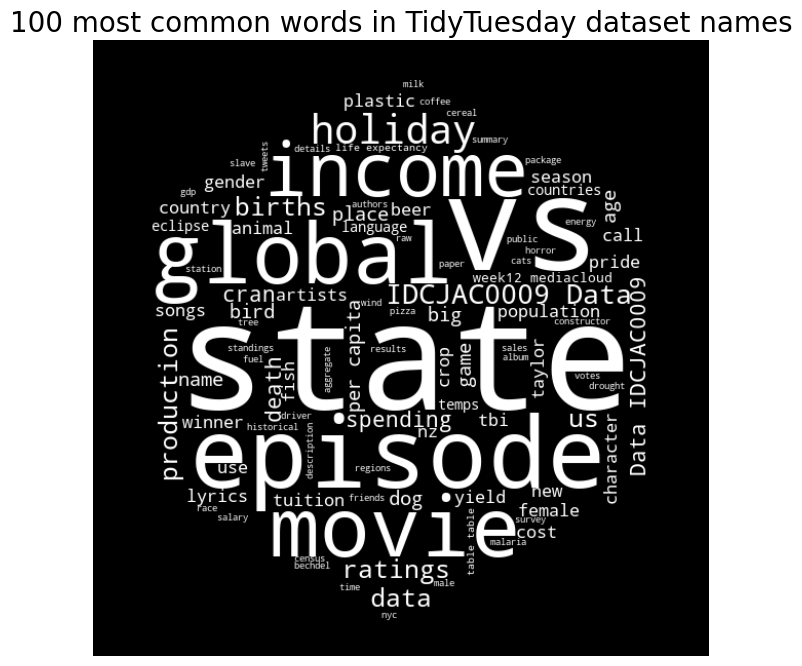

In [20]:
# white on a black background
mask_hex = np.array(Image.open('pic1-hexagon.png'))

def white_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(255,255,255)"

wordcloud_hex = WordCloud(background_color="black", max_words=100, mask=mask_hex, 
                          color_func = white_color_func, random_state=1).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud_hex, interpolation='bilinear')
plt.axis("off")
plt.title('100 most common words in TidyTuesday dataset names', fontsize=20)

plt.savefig('ttmeta_dataset_names_wc.png', bbox_inches='tight')

plt.show()

After exploring the number of variables and observations, as well as variable names, I didn't find anything that piqued my interest. So I moved on to the titles of the challenges.

In [23]:
tt_summary['lowercase'] = tt_summary['title'].apply(lambda x: str(x).lower())

In [24]:
title_text = ' '.join(tt_summary['lowercase'])

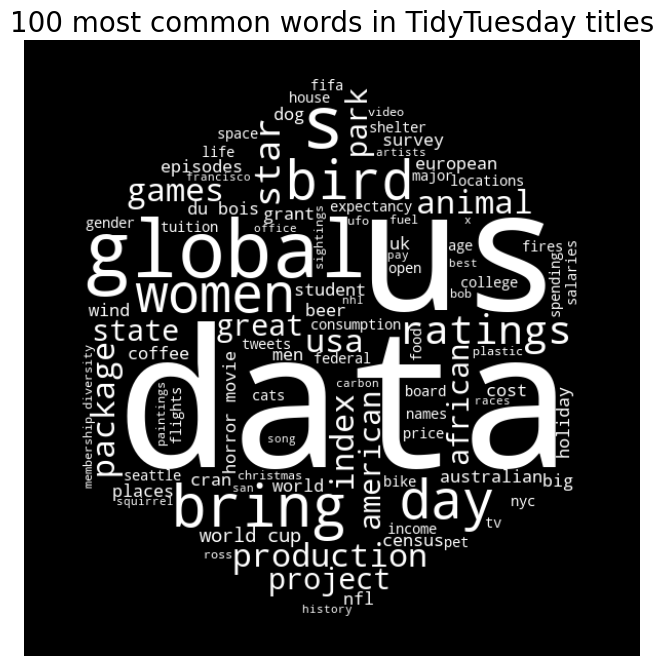

In [25]:
wordcloud_hex_titles = WordCloud(background_color="black", max_words=100, mask=mask_hex, color_func = white_color_func, 
                          random_state=1).generate(title_text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud_hex_titles, interpolation='bilinear')
plt.axis("off")
plt.title('100 most common words in TidyTuesday titles', fontsize=20)

plt.savefig('ttmeta_titles_wc.png', bbox_inches='tight')

plt.show()

No surprises there with this being a US-based data challenge.  I was surprised and intrigued to see 'bird' as a very common word in the titles.